In [3]:
from data_process import get_data_loaders, getFeatures
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('flights.csv') 
select_features = ['payload', 'wind_speed', 'wind_angle', 'linear_acceleration_x', 'linear_acceleration_y', 'linear_acceleration_z', 'power']
data, train_loader, val_loader, test_loader, d_split = get_data_loaders(data, 24, 10, test_size=0.2, val_size=0.2, 
                                                                        features=select_features, covariates=False)

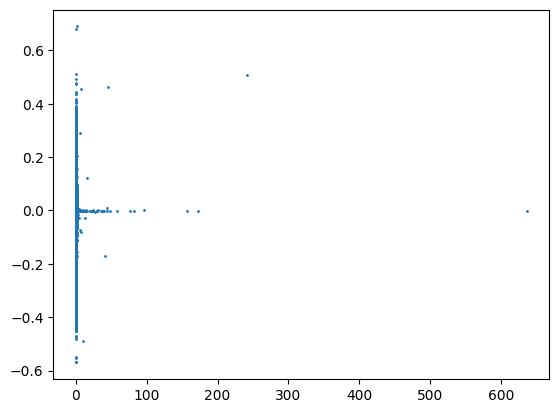

In [15]:
flight_num = 276
# flight_data = data[data['flight'] == flight_num]
flight_data = data.copy(deep=True)
flight_data['delta_power'] = flight_data['power'].diff()
flight_data['delta_x'] = flight_data['position_x'].diff()
flight_data['delta_y'] = flight_data['position_y'].diff()
flight_data['delta_z'] = flight_data['position_z'].diff()
flight_data['travel_dist'] = flight_data['delta_x']**2 + flight_data['delta_y']**2 + flight_data['delta_z']**2

sub_data = flight_data[flight_data['travel_dist'] > 0.01]

plt.scatter(sub_data['travel_dist'], sub_data['delta_power'], s=1)


In [19]:
cols = data.columns.to_list()
x_cols = [n for n in cols if n not in ['flight', 'power', 'time', 'current_atm']]
y_cols = ['power']

In [20]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = data[x_cols].values.reshape(-1, len(x_cols))
y = data[y_cols].values.reshape(-1, len(y_cols))

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

<BarContainer object of 31 artists>

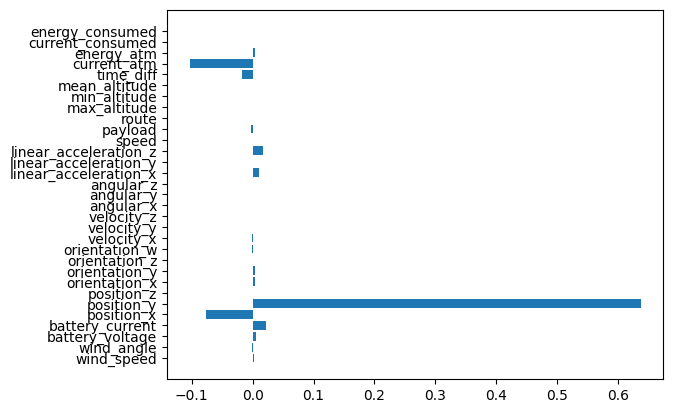

In [21]:
coef = reg.coef_
plt.barh(x_cols, coef[0])